# 안녕하세요^^ 
## '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "구별 업종 등록 데이터" 를 확인해 보도록 하겠습니다

In [1]:
# 필요 라이브러리부터 설치합니다.
#%pip install pandas seaborn

## 기본전제
* 처음에 제공되는 기본/추가 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* business_type.csv

[데이터 소개]
* 서울 시 구별 등록 업종 상위 10개 데이터
    * 택시운송업
    * 한식일반음식점업
    * 용달 화물자동차 운송업
    * 부동산 중개 및 대리업
    * 두발미용업
    * 커피전문점
    * 남녀용 겉옷 및 셔츠 도매업
    * 기타주점업
    * 일반 교과 학원
    * 한식 육류요리 전문점

[변수 소개]
* 다수 업종 상위 1~10

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

## 기본전제
* 처음에 제공되는 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* 1.4 business_type.csv

[데이터 소개]
* 서울시 업종 등록 데이터

#### [실습문제1] 데이터 로딩
* '1.4 business_type.csv'파일을 'seoul_business' 변수에 저장하고 그 데이터를 확인하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요

In [78]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import pandas as pd
seoul_business = pd.read_csv('1.4 business_type.csv', sep=",",thousands = ',', encoding = "UTF-8")

In [79]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_business.shape

(448, 22)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_moving' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [80]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   합계       448 non-null    object
 1   합계.1     448 non-null    object
 2   47,176   448 non-null    object
 3   76,701   448 non-null    object
 4   29,225   448 non-null    int64 
 5   100,183  448 non-null    int64 
 6   28,494   448 non-null    object
 7   29,356   448 non-null    object
 8   24,013   448 non-null    int64 
 9   42,636   448 non-null    int64 
 10  18,080   448 non-null    object
 11  36,214   448 non-null    object
 12  16,255   448 non-null    int64 
 13  57,322   448 non-null    int64 
 14  13,388   448 non-null    object
 15  51,116   448 non-null    object
 16  13,339   448 non-null    object
 17  31,371   448 non-null    object
 18  11,911   448 non-null    object
 19  50,773   448 non-null    object
 20  11,109   448 non-null    object
 21  44,653   448 non-null    object
dtypes:

In [81]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business.describe()

,"29,225","100,183","24,013","42,636","16,255","57,322"
count,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000
mean,130.468750,447.245536,107.200893,190.339286,72.566964,255.901786
std,276.242354,1036.046028,231.292826,470.321220,165.452048,627.806721
min,1.000000,3.000000,9.000000,10.000000,2.000000,4.000000
25%,33.000000,90.000000,33.000000,48.000000,15.000000,40.750000
50%,55.500000,164.000000,50.000000,76.000000,27.500000,84.500000
75%,96.000000,314.250000,76.000000,126.000000,49.250000,177.250000
max,2415.000000,11486.000000,2337.000000,6508.000000,1624.000000,7273.000000


In [82]:
seoul_business.head()

,합계,합계.1,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636",...,"16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
0,종로구,소계,215,215,1548,5912,618,646,549,889,...,948,3613,400,962,537,"1,413",110,382,437,"1,982"
1,종로구,사직동,7,7,230,982,12,12,57,96,...,124,525,2,18,74,177,9,34,45,220
2,종로구,삼청동,5,5,42,145,4,4,9,10,...,66,243,2,3,3,8,-,-,7,33
3,종로구,부암동,22,22,26,100,9,9,17,26,...,24,62,3,6,7,23,16,59,3,15
4,종로구,평창동,10,10,31,116,11,11,33,52,...,19,62,2,4,26,54,25,71,10,103


#### [실습문제3] 데이터 확인 및 처리

* 데이터를 보았을때, 어느 데이터를 가져와야 할지 생각 해 봅시다.

In [83]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
#seoul_business = seoul_business.drop(columns= [0])
seoul_business.drop(columns=seoul_business.columns[[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]], inplace=True)

In [84]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business.rename(columns = {'합계' : '자치구'}, inplace = True)
seoul_business.rename(columns = {'47,176' : '택시운송업 사업체 수'}, inplace = True)
seoul_business.rename(columns = {'76,701' : '택시운송업 종사자 수'}, inplace = True)
seoul_business.rename(columns = {'합계.1' : '동'}, inplace = True)

# seoul_business = seoul_business.drop(0)
# seoul_business = seoul_business.drop(1)
# seoul_business = seoul_business.drop(2)

In [85]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business.head()

,자치구,동,택시운송업 사업체 수,택시운송업 종사자 수
0,종로구,소계,215,215
1,종로구,사직동,7,7
2,종로구,삼청동,5,5
3,종로구,부암동,22,22
4,종로구,평창동,10,10


### 구별 소계 행만 뽑기

In [86]:
seoul_business = seoul_business[seoul_business.동 == '소계']

In [87]:
seoul_business.head()

,자치구,동,택시운송업 사업체 수,택시운송업 종사자 수
0,종로구,소계,215,215
18,중구,소계,230,235
34,용산구,소계,416,523
51,성동구,소계,"1,200","2,527"
69,광진구,소계,"1,119","1,744"


In [88]:
seoul_business.tail()

,자치구,동,택시운송업 사업체 수,택시운송업 종사자 수
338,관악구,소계,"1,286","2,027"
360,서초구,소계,417,903
379,강남구,소계,"1,796","2,517"
402,송파구,소계,"2,638","4,850"
430,강동구,소계,"3,295","4,980"


In [89]:
seoul_business = seoul_business.drop(columns=["동"])

In [90]:
# 해당 데이터프레임을 'df_seoul_business.csv' 파일로 저장하세요.

fpath = './df_seoul_business.csv'
seoul_business.to_csv(fpath, index=False, encoding='utf-8-sig')

In [94]:
seoul_business

,자치구,택시운송업 사업체 수,택시운송업 종사자 수
0,종로구,215,215
18,중구,230,235
34,용산구,416,523
51,성동구,"1,200","2,527"
69,광진구,"1,119","1,744"
85,동대문구,"1,546","2,093"
100,중랑구,"3,634","6,262"
117,성북구,"1,835","2,643"
138,강북구,"1,713","2,589"
152,도봉구,"2,993","5,783"


---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [91]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="NanumGothicCoding",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

#### [실습문제4] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

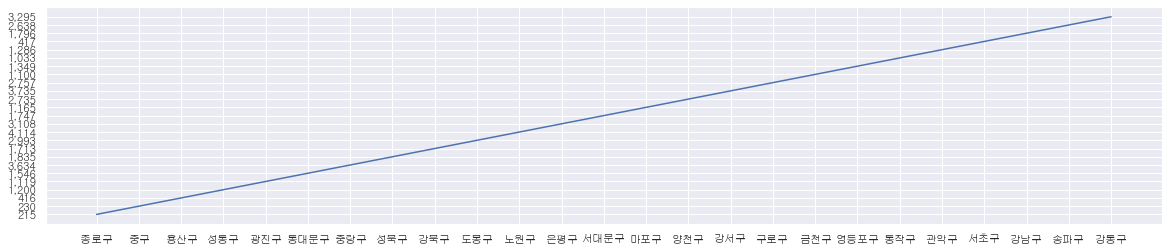

In [93]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.figure(figsize=(20,4))
plt.plot('자치구', '택시운송업 사업체 수', data = seoul_business)

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

---